<a href="https://colab.research.google.com/github/KOTEAYOON/colab/blob/main/07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 새와 비행기 구별하기 

In [2]:
from torchvision import datasets
data_path='/content/drive/MyDrive/pytorch_deep/file/data/p1ch7'
cifar10=datasets.CIFAR10(data_path,train=True,download=True)
cifar10_var=datasets.CIFAR10(data_path,train=False,download=True)


Files already downloaded and verified
Files already downloaded and verified


In [7]:
type(cifar10).__mro__ # __mro__는 상속받은 클래스의 우선순위를 확인할수있음

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [10]:
len(cifar10)

50000

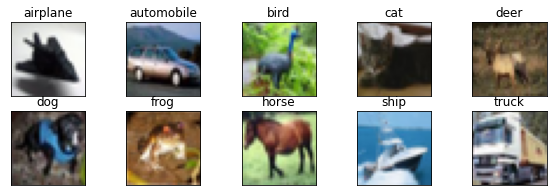

In [16]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

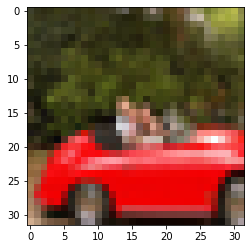

In [22]:
img, label = cifar10[99]

img, label, class_names[label]
plt.imshow(img)
plt.show()

In [25]:
# 이미지를 텐서로 변환
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape


torch.Size([3, 32, 32])

In [34]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())
img_t,_=tensor_cifar10[99] # _ 는 레이블(label) 값
type(img_t) # torch.Tensor
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [37]:
# ToTensor 변환으로 32비트 부동소수점 형태로 바뀌면서 0에서 1 사이의 값으로 변환
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

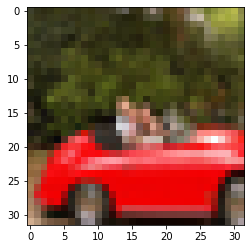

In [40]:
plt.imshow(img_t.permute(1,2,0)) # transpose() : 2개의 차원을 변경하는데 사용  permute() : 모든 차원의 순서를 재배치 
# 맷플롯립이 기대하는 형태를 위해 permute를 사용해 변경한다
plt.show()

# 데이터 정규화  

In [ ]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape


In [52]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [53]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [55]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [57]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [60]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

# transforms.ToTensor() - 데이터를 tensor로 바꿔준다.
# transforms.Normalize(mean, std, inplace=False) - 정규화한다.
# transforms.ToPILImage() - csv 파일로 데이터셋을 받을 경우, PIL image로 바꿔준다.
# transforms.Compose - 여러 단계로 변환해야 하는 경우, Compose를 통해 여러 단계를 묶을 수 있다.

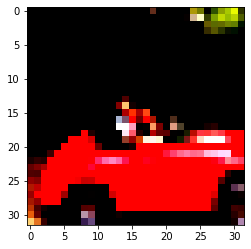

In [63]:
img_t,_=transformed_cifar10[99]
plt.imshow(img_t.permute(1,2,0))